## Predicting Price Of Used Cars

In this Project, we are going to predict the Price of Used Cars using various features like Present_Price, Selling_Price, Kms_Driven, Fuel_Type, Year etc. The data used in this project was downloaded from Kaggle.

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Loading data 

In [2]:
df = pd.read_csv('car_price_data2.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Pre-Processing

In [3]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df['Owner'].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [6]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## Feature Extraction

In [7]:
df['Car_age'] = 2020-df['Year']

In [8]:
df.drop(labels='Year',axis=1,inplace=True)

In [9]:
df

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,4
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,5
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,11
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,3


## Visualization

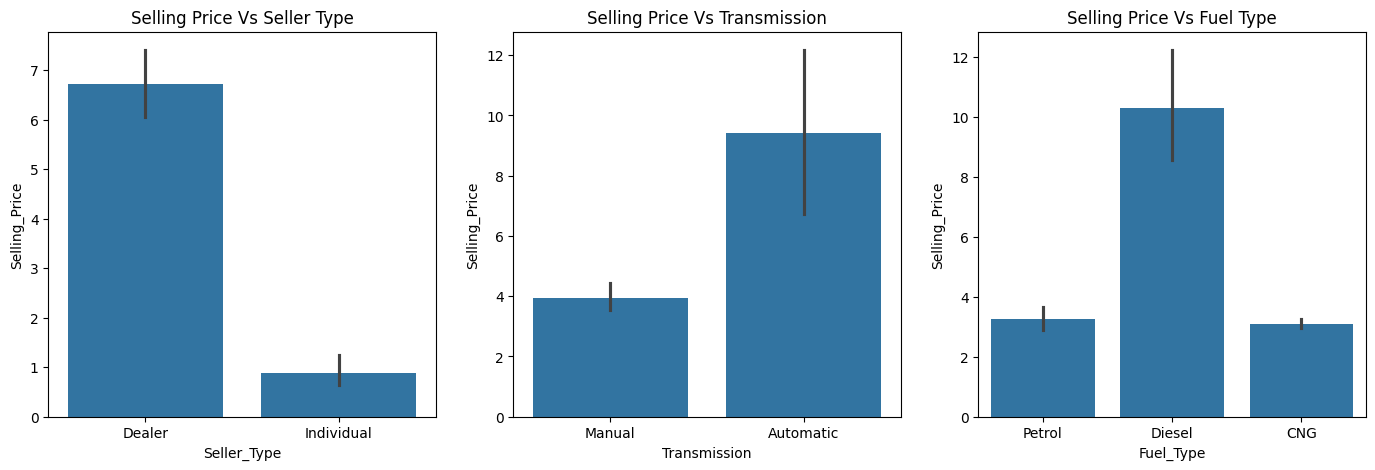

In [10]:

plt.figure(figsize=[17, 5])

plt.subplot(1, 3, 1)
sns.barplot(data=df, x='Seller_Type', y='Selling_Price')
plt.title('Selling Price Vs Seller Type')

plt.subplot(1, 3, 2)
sns.barplot(data=df, x='Transmission', y='Selling_Price')
plt.title('Selling Price Vs Transmission')

plt.subplot(1, 3, 3)
sns.barplot(data=df, x='Fuel_Type', y='Selling_Price')
plt.title('Selling Price Vs Fuel Type')

plt.show()


- Selling Price of cars seems to have higher prices when sold by Dealers when compared to Individuals
- It can be observed that Selling Price would be higher for cars that are Automatic.
- Selling Price of cars with Fuel Type of Diesel is higher than Petrol and CNG

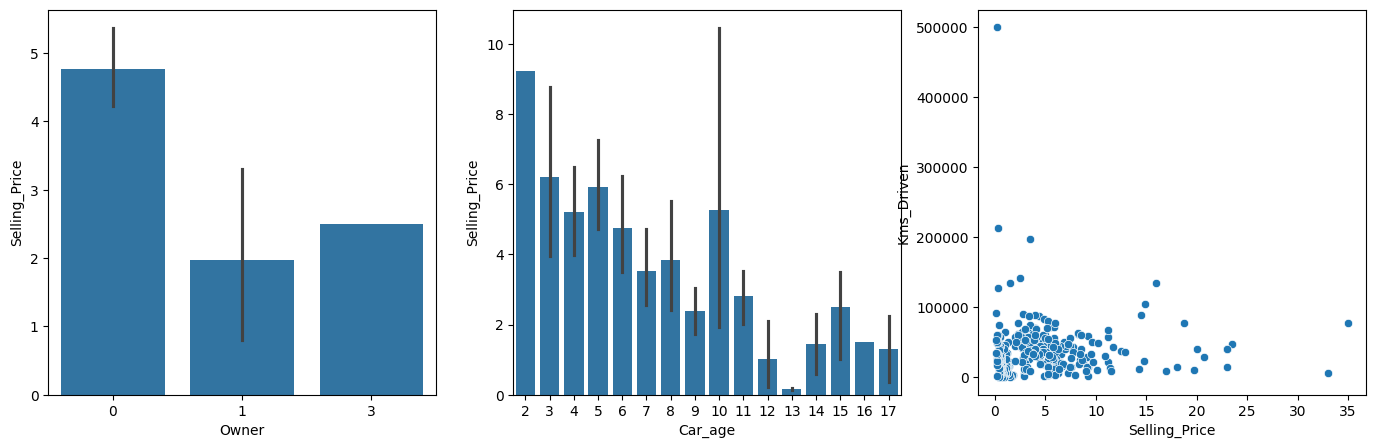

In [11]:

plt.figure(figsize=[17, 5])

plt.subplot(1, 3, 1)
sns.barplot(data=df, x='Owner', y='Selling_Price')

plt.subplot(1, 3, 2)
sns.barplot(data=df, x='Car_age', y='Selling_Price')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Selling_Price', y='Kms_Driven')

plt.show()

- Selling Price is high with less Owners used Cars *
- Selling Price of cars 2 years old would be high and gradually decreases with car of 17 years old *
- Lesser the Kms driven higher the Selling Price *

##  Converting categorical data

In [12]:
df = df.drop(labels='Car_Name', axis=1)

In [13]:
clean_data = pd.get_dummies(df,drop_first=True)
clean_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,False,True,False,True
1,4.75,9.54,43000,0,7,True,False,False,True
2,7.25,9.85,6900,0,3,False,True,False,True
3,2.85,4.15,5200,0,9,False,True,False,True
4,4.60,6.87,42450,0,6,True,False,False,True


In [14]:
clean_data = clean_data.astype(float)

In [15]:
clean_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000.0,0.0,6.0,0.0,1.0,0.0,1.0
1,4.75,9.54,43000.0,0.0,7.0,1.0,0.0,0.0,1.0
2,7.25,9.85,6900.0,0.0,3.0,0.0,1.0,0.0,1.0
3,2.85,4.15,5200.0,0.0,9.0,0.0,1.0,0.0,1.0
4,4.60,6.87,42450.0,0.0,6.0,1.0,0.0,0.0,1.0


## Checking Multicollinearity Using VIF

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = clean_data[['Present_Price','Kms_Driven','Owner','Car_age','Fuel_Type_Diesel',
                        'Fuel_Type_Petrol','Seller_Type_Individual','Transmission_Manual']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.201728,Present_Price
1,2.892026,Kms_Driven
2,1.087990,Owner
3,8.540393,Car_age
4,4.714762,Fuel_Type_Diesel
5,13.341429,Fuel_Type_Petrol
6,2.230179,Seller_Type_Individual
7,8.368965,Transmission_Manual


In [17]:
data_no_multicolinearity = clean_data.drop(['Kms_Driven','Fuel_Type_Petrol'],axis=1)

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = clean_data[['Present_Price','Owner','Car_age','Fuel_Type_Diesel',
                        'Seller_Type_Individual','Transmission_Manual']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,2.456996,Present_Price
1,1.084141,Owner
2,4.810633,Car_age
3,1.658039,Fuel_Type_Diesel
4,1.864471,Seller_Type_Individual
5,3.964982,Transmission_Manual


##  Feature Selection

decreases dimentions for easier model processing

<Axes: >

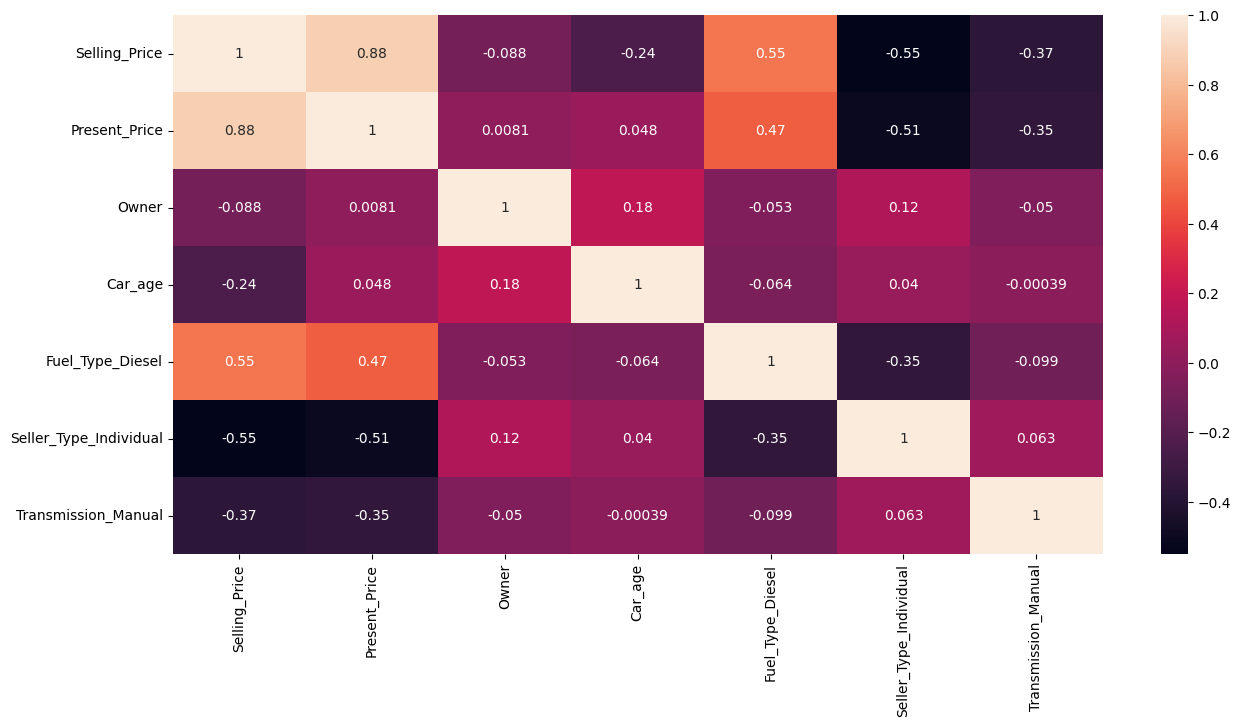

In [19]:
plt.figure(figsize=[15,7])
sns.heatmap(data_no_multicolinearity.corr(), annot=True)

If a variable has a p-values >0.05, we can disregard it.

In [20]:
from sklearn.feature_selection import f_regression,SelectKBest

X = data_no_multicolinearity.drop('Selling_Price',axis=1)
y = data_no_multicolinearity['Selling_Price']

f_regression(X,y)

p_values = f_regression(X,y)[1]
p_values.round(3)

array([0.   , 0.126, 0.   , 0.   , 0.   , 0.   ])

In [21]:
model_summry = pd.DataFrame(data=['Present_Price', 'Owner', 'Car_age', 'Fuel_Type_Diesel',
                              'Seller_Type_Individual', 'Transmission_Manual'], columns=['Features'])
model_summry['p-values'] = p_values.round(3)
model_summry.head()

,Features,p-values
0,Present_Price,0.000
1,Owner,0.126
2,Car_age,0.000
3,Fuel_Type_Diesel,0.000
4,Seller_Type_Individual,0.000


- Dropping the "Owner" feature which has p-value>0.05 resulting in insigificant. It means that Owner variable is not contributing that much in target variable

In [22]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [24]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

In [25]:
print(feat_importances.sort_values(ascending=False))

Present_Price             0.387654
Fuel_Type_Diesel          0.238984
Transmission_Manual       0.146153
Seller_Type_Individual    0.122799
Car_age                   0.103193
Owner                     0.001217
dtype: float64


In [26]:
final_df = data_no_multicolinearity[['Selling_Price', 'Present_Price', 'Car_age',
       'Fuel_Type_Diesel', 'Seller_Type_Individual', 'Transmission_Manual']]

In [27]:
clean_data.to_csv('car_price_data2_Final.csv', index=False)

## Linear Regression

In [28]:
X = final_df.drop('Selling_Price', axis=1)
y = final_df['Selling_Price']

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X[['Present_Price','Car_age']])

StandardScaler()

In [30]:
input_scaled = scaler.transform(X[['Present_Price','Car_age']])
scaled_data = pd.DataFrame(input_scaled, columns=['Present_Price','Car_age'])

In [31]:
X_scaled =scaled_data.join(X.drop(['Present_Price','Car_age'],axis=1))

In [32]:
X_scaled

,Present_Price,Car_age,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual
0,-0.236215,-0.128897,0.0,0.0,1.0
1,0.221505,0.217514,1.0,0.0,1.0
2,0.257427,-1.168129,0.0,0.0,1.0
3,-0.403079,0.910335,0.0,0.0,1.0
4,-0.087890,-0.128897,1.0,0.0,1.0
...,...,...,...,...,...
296,0.460214,-0.821718,1.0,0.0,1.0
297,-0.200292,-0.475308,0.0,0.0,1.0
298,0.390687,1.603156,0.0,0.0,1.0
299,0.564504,-1.168129,1.0,0.0,1.0


In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=365)

In [34]:
# Model Building
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Training Model
lr.fit(x_train,y_train)

# Model Summary
y_pred_lr = lr.predict(x_test)

r_squared = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("R_squared :",r_squared)

R_squared : 0.8407655400238144


## Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Training Model
rf.fit(x_train,y_train)

# Model Summary
y_pred_rf = rf.predict(x_test)

r_squared = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("R_squared :",r_squared)

R_squared : 0.9129809124944892
